In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
# figure size in inches
rcParams['figure.figsize'] = 12.,8.

import seaborn as sns
import pandas as pd
import wandb

pd.set_option('display.max_columns', None)



In [2]:
api = wandb.Api()
entity, project = "invariance-learners", "iclr2024experiments"  # set to your entity and project 
runs = api.runs(entity + "/" + project)

In [3]:
run = runs[0]
run.config.keys()

dict_keys(['α', 'β', 'γ', 'hais', 'iwlb', 'seed', 'angle', 'model', 'optim', 'dataset', 'num_trn', 'num_val', 'pp_eval', 'shuffle', 'pp_train', 'run_hais', 'run_iwlb', 'val_split', 'batch_size', 'eval_every', 'model_name', 'optim_name', 'lr_schedule', 'total_steps', 'train_split', 'β_schedule', 'learning_rate', 'batch_size_eval', 'lr_schedule_name', 'β_schedule_name', 'shuffle_buffer_size', 'repeat_after_batching'])

In [4]:
summary_list, config_list, name_list, tags, ids, states = [], [], [], [], [], []
for run in runs: 
    # .summary contains the output keys/values for metrics like accuracy.
    #  We call ._json_dict to omit large files 
    summary_list.append(run.summary._json_dict)

    # .config contains the hyperparameters.
    #  We remove special values that start with _.
    config_list.append(
        {k: v for k,v in run.config.items()
         if not k.startswith('_')})

    # .name is the human-readable name of the run.
    name_list.append(run.name)

    tags.append(run.tags)

    ids.append(run.id)

    states.append(run.state)

runs_df = pd.DataFrame({
    "summary": summary_list,
    "config": config_list,
    "name": name_list,
    "tags": tags,
    "id": ids,
    "state": states
    })

runs_df

,summary,config,name,tags,id,state
0,"{'β': 1.0000016689300537, '_timestamp': 168731...","{'α': 1, 'β': 10, 'γ': 1, 'hais': {'num_steps'...",stellar-snowflake-1305,"[angle_sweep, baseline, mnist, vae]",3j8wt8cp,finished
1,"{'α': 1, 'train/ll': 375.0333557128906, 'best_...","{'α': 1, 'β': 10, 'γ': 1, 'hais': {'num_steps'...",fine-lion-1304,"[angle_sweep, baseline, mnist, vae]",1bz16p02,finished
2,"{'σ_vae': 0.14208735525608063, 'train/loss': -...","{'α': 1, 'β': 10, 'γ': 1, 'hais': {'num_steps'...",vital-donkey-1303,"[angle_sweep, baseline, mnist, vae]",158ln96a,finished
3,"{'val/loss': 2355.17431640625, '_timestamp': 1...","{'α': 1, 'β': 10, 'γ': 1, 'hais': {'num_steps'...",glowing-snowflake-1302,"[angle_sweep, baseline, mnist, vae]",soskbbrm,finished
4,"{'best_val_z_kld': 26.00506591796875, 'val/iwl...","{'α': 1, 'β': 10, 'γ': 1, 'hais': {'num_steps'...",azure-bird-1300,"[angle_sweep, baseline, mnist, vae]",1rzizcx7,finished
...,...,...,...,...,...,...
1267,"{'val/elbo': 950.5360717773438, 'best_val_elbo...","{'α': 1, 'β': 10, 'γ': 1, 'hais': {'num_steps'...",mild-frost-8,"[angle_sweep, baseline, hidden, mnist, vae]",2pz2qcqy,finished
1268,"{'β': 1.0000003576278689, 'val_reconstructions...","{'α': 1, 'β': 10, 'γ': 1, 'hais': {'num_steps'...",dauntless-aardvark-6,"[angle_sweep, baseline, hidden, mnist, vae]",2611qumv,finished
1269,"{'val/z_kld': 41.24858856201172, 'best_val_ll'...","{'α': 1, 'β': 10, 'γ': 1, 'hais': {'num_steps'...",still-terrain-2,"[angle_sweep, baseline, hidden, mnist, vae]",1tpxj7i9,finished
1270,"{'_step': 7500, 'val/z_kld': 41.51310729980469...","{'α': 1, 'β': 10, 'γ': 1, 'hais': {'num_steps'...",sparkling-smoke-4,"[angle_sweep, baseline, hidden, mnist, vae]",1ou24u56,finished


In [5]:
df_expanded = runs_df.join(pd.json_normalize(runs_df['summary'], record_prefix='summary.').add_prefix('summary.')).drop('summary', axis='columns')
df_expanded = df_expanded.join(pd.json_normalize(runs_df['config'], record_prefix='config').add_prefix('config.')).drop('config', axis='columns')

df_expanded.columns

Index(['name', 'tags', 'id', 'state', 'summary.β', 'summary._timestamp',
       'summary.train/loss', 'summary.best_val_loss', 'summary.train/elbo',
       'summary.val/elbo', 'summary.best_val_ll', 'summary.best_val_elbo',
       'summary.best_val_z_kld', 'summary.train/ll', 'summary.val/z_kld',
       'summary.best_val_step', 'summary._step', 'summary.val/ll',
       'summary.σ_vae', 'summary._runtime', 'summary.val/iwlb', 'summary.α',
       'summary.γ', 'summary.val/loss', 'summary.learing_rate',
       'summary.best_val_iwlb', 'summary.train/z_kld',
       'summary.val_reconstructions.format',
       'summary.val_reconstructions.height',
       'summary.val_reconstructions.sha256',
       'summary.val_reconstructions.path', 'summary.val_reconstructions.size',
       'summary.val_reconstructions._type',
       'summary.val_reconstructions.width', 'summary.prior_samples.width',
       'summary.prior_samples.format', 'summary.prior_samples.height',
       'summary.prior_samples.sha25

In [6]:
# take only completed runs
df_filtered = df_expanded[df_expanded['state'] == 'finished']

# take only runs with certain tags
tags_to_keep = ['angle_sweep']
df_filtered = df_filtered[df_filtered['tags'].apply(lambda x: all(tag in x for tag in tags_to_keep))]

# take only runs without certain tags
tags_to_remove = ['test', 'hidden']
df_filtered = df_filtered[~df_filtered['tags'].apply(lambda x: any(tag in x for tag in tags_to_remove))]

df_filtered

,name,tags,id,state,summary.β,summary._timestamp,summary.train/loss,summary.best_val_loss,summary.train/elbo,summary.val/elbo,summary.best_val_ll,summary.best_val_elbo,summary.best_val_z_kld,summary.train/ll,summary.val/z_kld,summary.best_val_step,summary._step,summary.val/ll,summary.σ_vae,summary._runtime,summary.val/iwlb,summary.α,summary.γ,summary.val/loss,summary.learing_rate,summary.best_val_iwlb,summary.train/z_kld,summary.val_reconstructions.format,summary.val_reconstructions.height,summary.val_reconstructions.sha256,summary.val_reconstructions.path,summary.val_reconstructions.size,summary.val_reconstructions._type,summary.val_reconstructions.width,summary.prior_samples.width,summary.prior_samples.format,summary.prior_samples.height,summary.prior_samples.sha256,summary.prior_samples.path,summary.prior_samples.size,summary.prior_samples._type,summary._wandb.runtime,summary.best_prior_samples.format,summary.best_prior_samples.height,summary.best_prior_samples.sha256,summary.best_prior_samples.path,summary.best_prior_samples.size,summary.best_prior_samples._type,summary.best_prior_samples.width,summary.hais_mll,config.α,config.β,config.γ,config.seed,config.angle,config.dataset,config.num_trn,config.num_val,config.pp_eval,config.shuffle,config.pp_train,config.run_hais,config.run_iwlb,config.val_split,config.batch_size,config.eval_every,config.model_name,config.optim_name,config.total_steps,config.train_split,config.learning_rate,config.batch_size_eval,config.lr_schedule_name,config.β_schedule_name,config.shuffle_buffer_size,config.repeat_after_batching,config.hais.num_steps,config.hais.step_size,config.hais.num_chains,config.hais.num_leapfrog_steps,config.iwlb.num_samples,config.model.X_given_Z.conv_dims,config.model.X_given_Z.dense_dims,config.model.X_given_Z.max_2strides,config.model.Z_given_X.conv_dims,config.model.Z_given_X.dense_dims,config.model.Z_given_X.max_2strides,config.model.latent_dim,config.optim.weight_decay,config.lr_schedule.end_value,config.lr_schedule.peak_value,config.lr_schedule.decay_steps,config.lr_schedule.warmup_steps,config.β_schedule.alpha,config.β_schedule.decay_steps,config.repeat_after_batch
0,stellar-snowflake-1305,"[angle_sweep, baseline, mnist, vae]",3j8wt8cp,finished,1.000002,1.687318e+09,-343.877747,-124.631569,343.877747,124.631569,167.573227,124.631569,39.070972,384.353699,39.070972,3500.0,3750.0,167.573227,0.235836,358.0,165.448792,1.0,1.0,-124.631569,0.0001,165.448792,40.475689,png,400.0,d5ce0263f7d9af7b0c89fb770cac30a375c53401c29489...,media/images/val_reconstructions_3500_d5ce0263...,64717.0,image-file,4000.0,4000.0,png,200.0,92081302db6ee6dda11e9cef602e3797d1e900a22620cb...,media/images/prior_samples_3500_92081302db6ee6...,55202.0,image-file,359.0,png,200.0,92081302db6ee6dda11e9cef602e3797d1e900a22620cb...,media/images/best_prior_samples_summary_920813...,55202.0,image-file,4000.0,NaN,1,10,1,0,360.0,MNIST,1562.0,10000.0,"value_range(-1, 1)|random_rotate(-360, 360, fi...",preprocessed,"value_range(-1, 1)|random_rotate(-360, 360, fi...",False,True,train[:10000],512,500,VAE,adamw,3751,train[10000:11562],0.0001,64,warmup_cosine_decay_schedule,cosine_decay_schedule,50000,True,100,0.008,300,2,100,"[512, 256, 128]",[512],2,"[128, 256, 512]",[512],2,32,0.0001,0.0001,0.001,3751,375,0.1,3751,NaN
1,fine-lion-1304,"[angle_sweep, baseline, mnist, vae]",1bz16p02,finished,1.000002,1.687317e+09,-336.867554,-90.897858,336.867554,90.897858,131.345596,90.897858,36.801834,375.033356,36.801834,3500.0,3750.0,131.345596,0.231651,143.0,130.242981,1.0,1.0,-90.897858,0.0001,130.242981,38.165573,png,400.0,a2fe4e6a53181d7cec108b60eee82a5376e455692a2c13...,media/images/val_reconstructions_3500_a2fe4e6a...,63865.0,image-file,4000.0,4000.0,png,200.0,b006cdf69d6786c57aaf604be319faa29e3153d75cd4f9...,media/images/prior_samples_3500_b006cdf69d6786...,55058.0,image-file,144.0,png,200.0,b006cdf69d6786c57aaf604be319faa29e3153d75cd4f9...,media/images/best_prior_samples_summary_b006cd...,55058.0,image-file,4000.0,NaN,1,1

In [7]:
# replace NaNs in config.shuffle with "loaded"
# df_filtered['config.shuffle'] = df_filtered['config.shuffle'].fillna('loaded')

In [8]:
df_filtered['config.angle'].unique()

array([360., 270., 180., 135.,  90.,  45.,  30.,  15.,   5.,   1.,   0.])

In [9]:
df_filtered['config.total_steps'].unique()

array([ 3751,  7501, 15001])

In [10]:
df_filtered['config.num_trn'].unique()

array([ 1562.,  3125.,  6250., 12500., 25000., 50000.])

In [11]:
df_filtered['size_mult'] = df_filtered['config.model.latent_dim'] // 8

/tmp/ipykernel_14672/676972996.py:21: FutureWarning: The default value of regex will change from True to False in a future version.
  plot_df['metric'] = plot_df['metric'].str.replace('summary.', '')


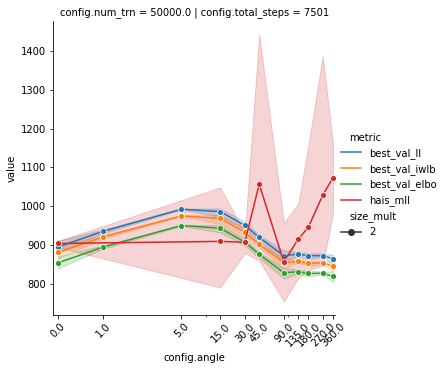

In [12]:
plot_df = df_filtered[[
    'summary.best_val_ll', 'summary.best_val_iwlb', 'summary.best_val_elbo', 'summary.hais_mll', 
    'config.angle', 'config.num_trn', 'config.total_steps', 'config.model_name', 'size_mult', 'config.repeat_after_batch',
]]

# take only some settings
plot_df = plot_df[
    plot_df['config.total_steps'].isin([7501]) & plot_df['config.num_trn'].isin([50_000]) & plot_df['size_mult'].isin([2])
]

# pivot the data frame so that each of 'summary.best_val_ll', 'summary.best_val_iwlb', 'summary.best_val_elbo', 'summary.hais_mll'
# is a column, and the values are the corresponding values
plot_df = plot_df.melt(
    id_vars=['config.angle', 'config.num_trn', 'config.total_steps', 'config.model_name', 'size_mult', 'config.repeat_after_batch',],
    value_vars=['summary.best_val_ll', 'summary.best_val_iwlb', 'summary.best_val_elbo', 'summary.hais_mll'],
    var_name='metric',
    value_name='value'
)

# remove the 'summary.' prefix from the metric names
plot_df['metric'] = plot_df['metric'].str.replace('summary.', '')

# # map config.total_steps to consistent values, if they are in this dict
# new_vals = {30003: 15001, 15003: 7501, 10003: 5001, 7003: 3501}
# plot_df = plot_df.replace({'config.total_steps': new_vals})

g = sns.relplot(
    x="config.angle", y="value", hue="metric", style='size_mult', row="config.num_trn", col='config.total_steps',
    # size='config.repeat_after_batch',
    markers=True,
    # palette=sns.color_palette('viridis', as_cmap=True),
    kind="line",
    # col_wrap=2,
    facet_kws=dict(sharey=False, sharex=False),
    # errorbar=None,
    data=plot_df
)
# g.set_axis_labels('Rotation angle', 'Best validation log-likelihood')
# g.set_titles('Total steps: {col_name}')
for axs in g.axes:
    for ax in axs:
        ax.set(xscale="symlog")
        ax.set_xticks(plot_df['config.angle'].unique())
        ax.set_xticklabels(plot_df['config.angle'].unique(), rotation=45)
        ax.set_xlim(-.1, 385)
plt.show()

/tmp/ipykernel_14672/1706868702.py:21: FutureWarning: The default value of regex will change from True to False in a future version.
  plot_df['metric'] = plot_df['metric'].str.replace('summary.', '')


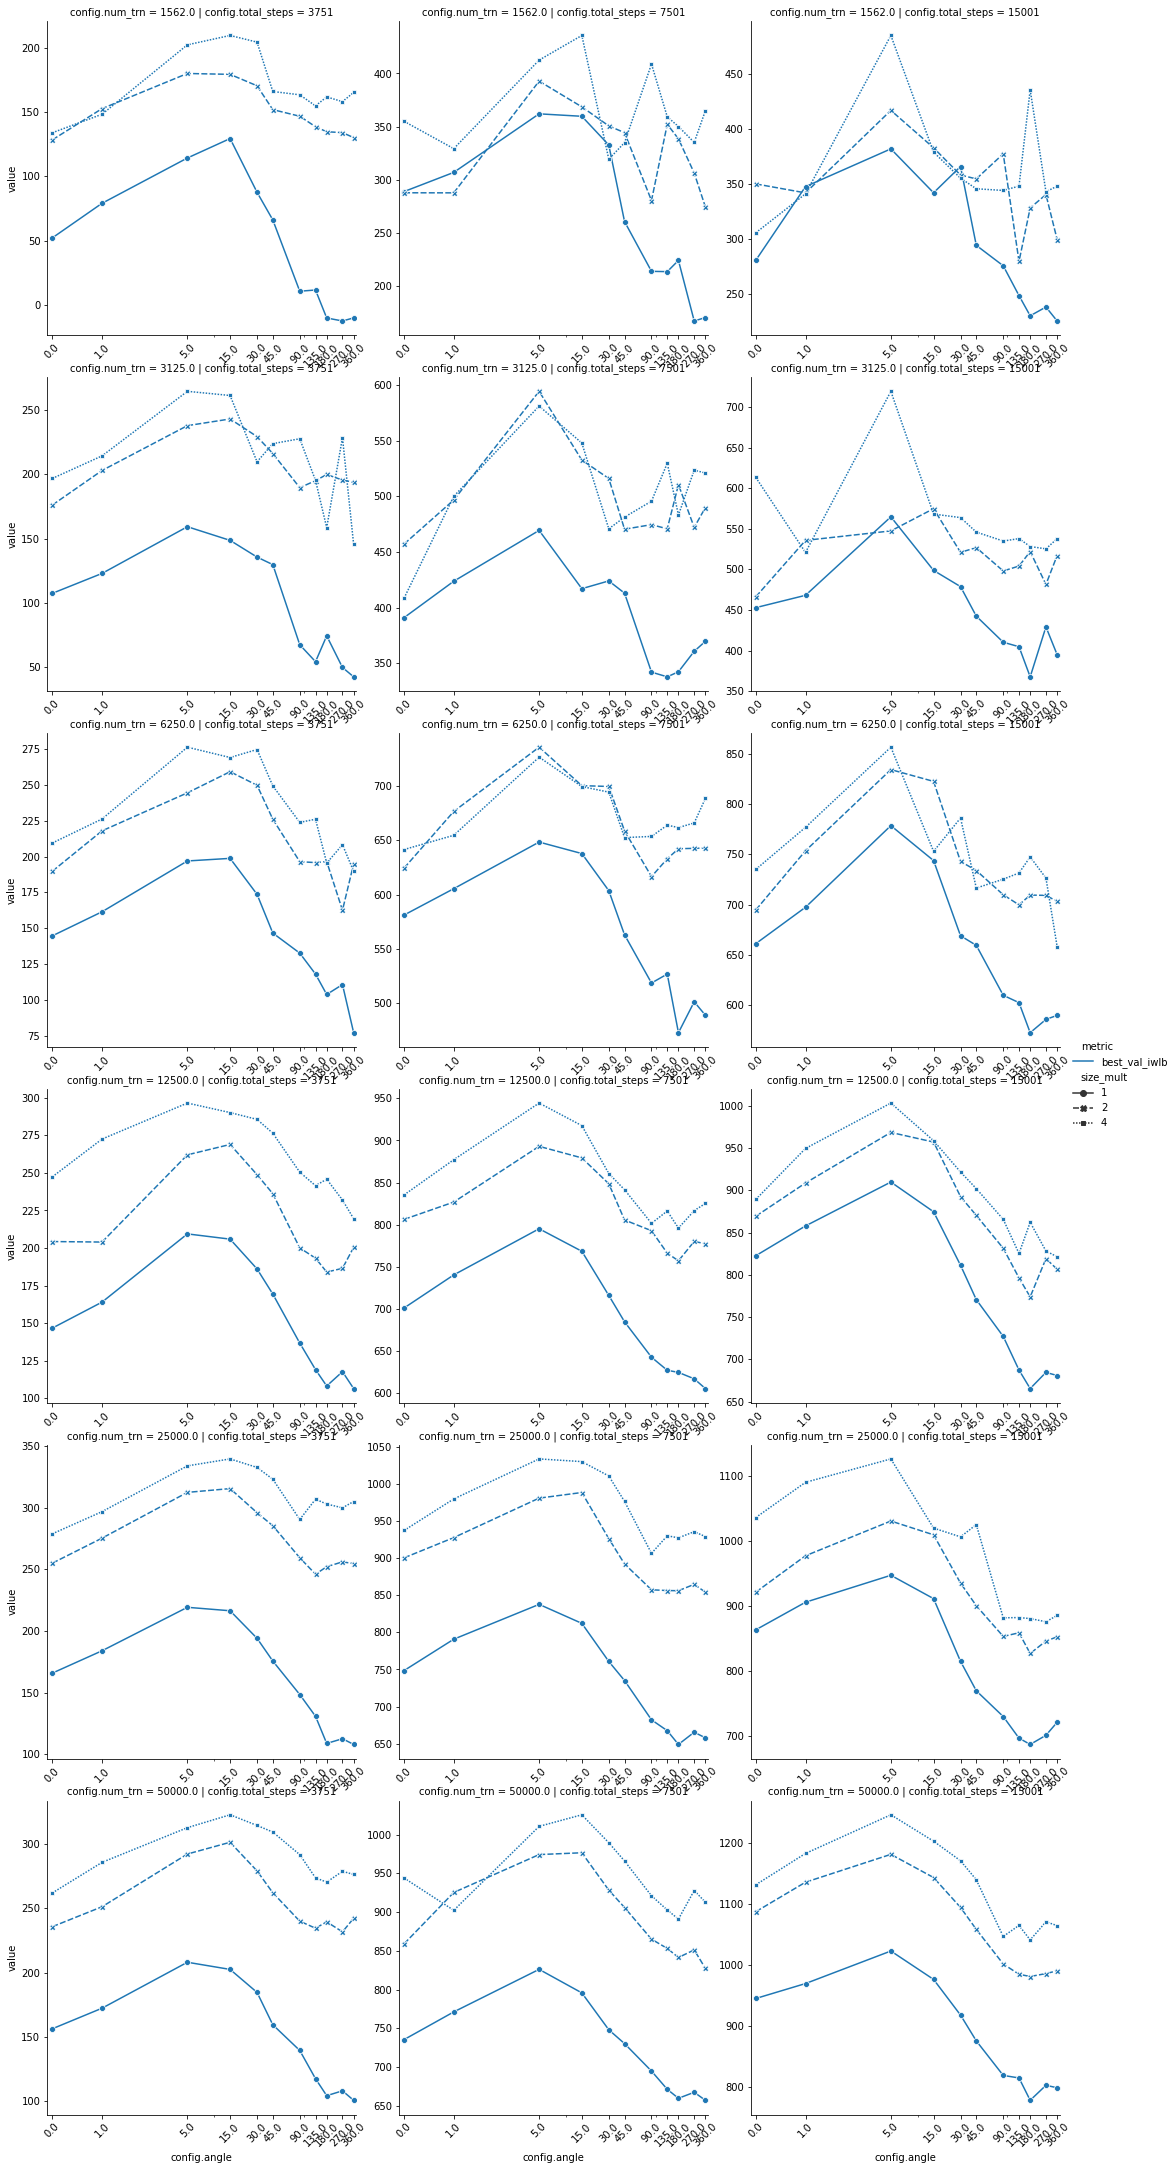

In [14]:
plot_df = df_filtered[[
    'summary.best_val_ll', 'summary.best_val_iwlb', 'summary.best_val_elbo', 'summary.hais_mll', 
    'config.angle', 'config.num_trn', 'config.total_steps', 'config.model_name', 'size_mult', 'config.shuffle',
]]

plot_df = plot_df[plot_df["config.shuffle"] == "preprocessed"]

# pivot the data frame so that each of 'summary.best_val_ll', 'summary.best_val_iwlb', 'summary.best_val_elbo', 'summary.hais_mll'
# is a column, and the values are the corresponding values
plot_df = plot_df.melt(
    id_vars=['config.angle', 'config.num_trn', 'config.total_steps', 'config.model_name', 'size_mult', 'config.shuffle',],
    value_vars=['summary.best_val_ll', 'summary.best_val_iwlb', 'summary.best_val_elbo', 'summary.hais_mll'],
    var_name='metric',
    value_name='value'
)

# only plot 'summary.best_val_iwlb'
plot_df = plot_df[plot_df['metric'] == 'summary.best_val_iwlb']

# remove the 'summary.' prefix from the metric names
plot_df['metric'] = plot_df['metric'].str.replace('summary.', '')

# # map config.total_steps to consistent values, if they are in this dict
# new_vals = {30003: 15001, 15003: 7501, 10003: 5001, 7003: 3501}
# plot_df = plot_df.replace({'config.total_steps': new_vals})

g = sns.relplot(
    x="config.angle", y="value", hue="metric", style='size_mult', row="config.num_trn", col='config.total_steps',
    # size='config.shuffle',
    markers=True,
    # palette=sns.color_palette('viridis', as_cmap=True),
    kind="line",
    # col_wrap=2,
    facet_kws=dict(sharey=False, sharex=False),
    errorbar=None,
    data=plot_df
)
# g.set_axis_labels('Rotation angle', 'Best validation log-likelihood')
# g.set_titles('Total steps: {col_name}')
for axs in g.axes:
    for ax in axs:
        ax.set(xscale="symlog")
        ax.set_xticks(plot_df['config.angle'].unique())
        ax.set_xticklabels(plot_df['config.angle'].unique(), rotation=45)
        ax.set_xlim(-.1, 385)
plt.show()

/tmp/ipykernel_6223/4288803908.py:16: FutureWarning: The default value of regex will change from True to False in a future version.
  plot_df['metric'] = plot_df['metric'].str.replace('summary.', '')


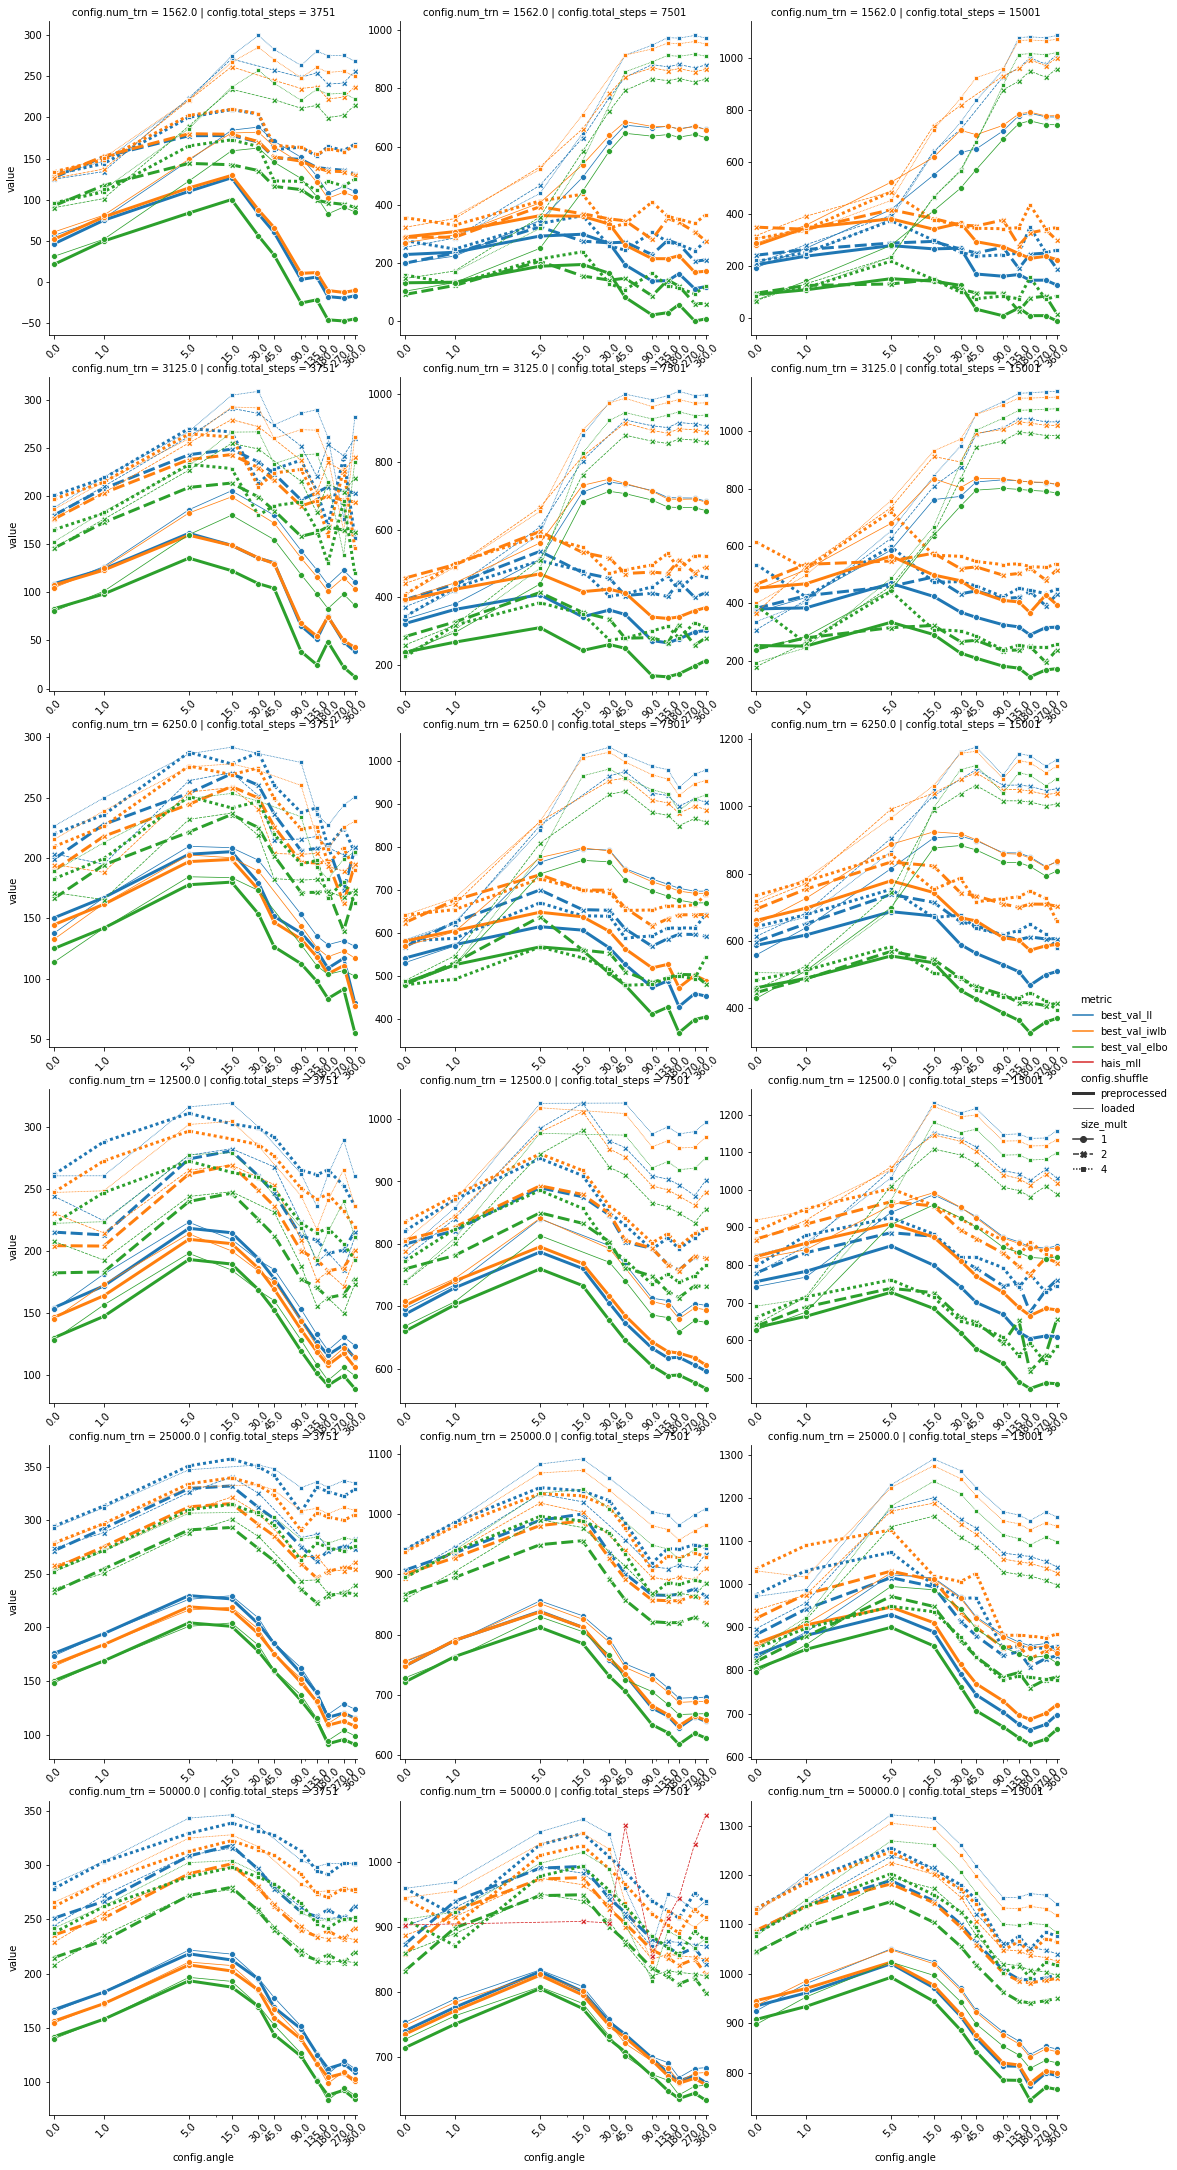

In [14]:
plot_df = df_filtered[[
    'summary.best_val_ll', 'summary.best_val_iwlb', 'summary.best_val_elbo', 'summary.hais_mll', 
    'config.angle', 'config.num_trn', 'config.total_steps', 'config.model_name', 'size_mult', 'config.shuffle',
]]

# pivot the data frame so that each of 'summary.best_val_ll', 'summary.best_val_iwlb', 'summary.best_val_elbo', 'summary.hais_mll'
# is a column, and the values are the corresponding values
plot_df = plot_df.melt(
    id_vars=['config.angle', 'config.num_trn', 'config.total_steps', 'config.model_name', 'size_mult', 'config.shuffle',],
    value_vars=['summary.best_val_ll', 'summary.best_val_iwlb', 'summary.best_val_elbo', 'summary.hais_mll'],
    var_name='metric',
    value_name='value'
)

# remove the 'summary.' prefix from the metric names
plot_df['metric'] = plot_df['metric'].str.replace('summary.', '')

# # map config.total_steps to consistent values, if they are in this dict
# new_vals = {30003: 15001, 15003: 7501, 10003: 5001, 7003: 3501}
# plot_df = plot_df.replace({'config.total_steps': new_vals})

g = sns.relplot(
    x="config.angle", y="value", hue="metric", style='size_mult', row="config.num_trn", col='config.total_steps',
    size='config.shuffle',
    markers=True,
    # palette=sns.color_palette('viridis', as_cmap=True),
    kind="line",
    # col_wrap=2,
    facet_kws=dict(sharey=False, sharex=False),
    errorbar=None,
    data=plot_df
)
# g.set_axis_labels('Rotation angle', 'Best validation log-likelihood')
# g.set_titles('Total steps: {col_name}')
for axs in g.axes:
    for ax in axs:
        ax.set(xscale="symlog")
        ax.set_xticks(plot_df['config.angle'].unique())
        ax.set_xticklabels(plot_df['config.angle'].unique(), rotation=45)
        ax.set_xlim(-.1, 385)
plt.show()